In [1]:
options(warn=-1)

In [3]:
library(tidyr)
library(dplyr)
library(ggplot2)
library(patchwork)

In [4]:
main_theme = theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 20, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 20), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank()) 

In [5]:
spc <- read.csv('/path/to/data/spc.csv', sep = ",", header = T, row.names = 1)
names(spc) <- gsub("^X", "", names(spc))
head(spc)

,vial,397.307,401.164,405.022,408.879,412.736,416.594,420.451,424.308,428.166,⋯,dim_da,dim_ket,dim_mast,met_in,da_in,ket_in,mast_in,disease_in,disease_min,disease
,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,JM006 1000,-0.07326907,1,1,1,-0.1279949,-0.1188428,-0.1338351,14.81902,-0.1274847,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
2,JM006 1002,0.04021398,1,1,1,14.9473063,0.1117955,14.7098770,14.71823,14.7977676,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
3,JM006 1003,15.05952360,1,1,1,0.8254424,0.1740542,14.9310503,14.90867,0.2375899,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
4,JM006 1004,15.64211768,1,1,1,14.8384736,0.1018710,14.8572984,14.94703,0.2181086,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
5,JM006 1005,14.67025372,1,1,1,14.8736669,14.5768853,14.6524259,14.83394,15.0828729,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
6,JM006 1006,0.35748126,1,1,1,15.1296416,14.8059751,14.8534811,14.84384,14.9129939,⋯,NA,NA,16,NA,NA,NA,12,12,16,1


#### Figure 3A

In [6]:
filter_data <- function(data) {
  data_filtered <- data[, which(as.numeric(colnames(data)) > 1000 & as.numeric(colnames(data)) < 3000)]
  data_filtered <- data_filtered[, which(as.numeric(colnames(data_filtered)) < 1580 | as.numeric(colnames(data_filtered)) > 1700)]
  data_filtered <- data.frame(absorbance = colMeans(data_filtered, na.rm = TRUE))
  data_filtered$wavenum <- as.numeric(rownames(data_filtered))
  
  return(data_filtered)
}

health <- spc %>% filter(disease == 0 & dim <= 7)
health_filtered <- health[, which(as.numeric(colnames(health)) > 1000 & as.numeric(colnames(health)) < 3000)]
health_filtered <- health_filtered[, which(as.numeric(colnames(health_filtered)) < 1580 | as.numeric(colnames(health_filtered)) > 1700)]
health_filtered <- data.frame(absorbance = colMeans(health_filtered, na.rm = TRUE))
health_filtered$wavenum <- as.numeric(rownames(health_filtered))
health_filtered$group <- 'health'

mast <- spc[!is.na(spc$dim_mast) & is.na(spc$dim_met) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$disease_in <= 7, ]
mast_0 <- mast[mast$dim == 0,] 
filtered_mast_0 <- filter_data(mast_0)
filtered_mast_0$group <- '0'
mast_1 <- mast[mast$dim == 1,] 
filtered_mast_1 <- filter_data(mast_1)
filtered_mast_1$group <- '1'
mast_2 <- mast[mast$dim == 2,] 
filtered_mast_2 <- filter_data(mast_2)
filtered_mast_2$group <- '2'
mast_3 <- mast[mast$dim == 3,] 
filtered_mast_3 <- filter_data(mast_3)
filtered_mast_3$group <- '3'
mast_4 <- mast[mast$dim == 4,] 
filtered_mast_4 <- filter_data(mast_4)
filtered_mast_4$group <- '4'
mast_5 <- mast[mast$dim >= 5 & mast$dim <=7,] 
filtered_mast_5 <- filter_data(mast_5)
filtered_mast_5$group <- '5'

mast_filtered <- rbind(filtered_mast_0, filtered_mast_1, filtered_mast_2, filtered_mast_3, filtered_mast_4, filtered_mast_5)
mast_filtered$group <- factor(mast_filtered$group, levels=c("health", "5", "4", "3", "2", "1", "0"))

r11 <- c(health[['2923.87']], mast_0[['2923.87']], mast_1[['2923.87']], mast_2[['2923.87']], mast_3[['2923.87']], mast_4[['2923.87']], mast_5[['2923.87']])
parity <- c(health[['parity']], mast_0[['parity']], mast_1[['parity']], mast_2[['parity']], mast_3[['parity']], mast_4[['parity']], mast_5[['parity']])
dim <- c(health[['disease_in']], mast_0[['disease_in']], mast_1[['disease_in']], mast_2[['disease_in']], mast_3[['disease_in']], mast_4[['disease_in']], mast_5[['disease_in']])
group <- c(rep('health', length(health[['2923.87']])), rep('0', length(mast_0[['2923.87']])), rep('1', length(mast_1[['2923.87']])), rep('2', length(mast_2[['2923.87']])), rep('3', length(mast_3[['2923.87']])), rep('4', length(mast_4[['2923.87']])), rep('5', length(mast_5[['2923.87']])))
r11 <- data.frame(absorbance = r11, group = group, parity = parity, dim = dim)
r11$group <- factor(r11$group, levels=c("health", "0", "1", "2", "3", "4", "5"))
r11$parity <- sapply(r11$parity, function(x) ifelse(x >= 3, '≥3', x))
r11$dim <- sapply(r11$dim, function(x) ifelse(x >= 5, '≥5', x))
                  
r12 <- c(health[['2854.44']], mast_0[['2854.44']], mast_1[['2854.44']], mast_2[['2854.44']], mast_3[['2854.44']], mast_4[['2854.44']], mast_5[['2854.44']])
parity <- c(health[['parity']], mast_0[['parity']], mast_1[['parity']], mast_2[['parity']], mast_3[['parity']], mast_4[['parity']], mast_5[['parity']])
dim <- c(health[['disease_in']], mast_0[['disease_in']], mast_1[['disease_in']], mast_2[['disease_in']], mast_3[['disease_in']], mast_4[['disease_in']], mast_5[['disease_in']])
group <- c(rep('health', length(health[['2854.44']])), rep('0', length(mast_0[['2854.44']])), rep('1', length(mast_1[['2854.44']])), rep('2', length(mast_2[['2854.44']])), rep('3', length(mast_3[['2854.44']])), rep('4', length(mast_4[['2854.44']])), rep('5', length(mast_5[['2854.44']])))
r12 <- data.frame(absorbance = r12, group = group, parity = parity, dim = dim)
r12$group <- factor(r12$group, levels=c("health", "0", "1", "2", "3", "4", "5"))
r12$parity <- sapply(r12$parity, function(x) ifelse(x >= 3, '≥3', x))
r12$dim <- sapply(r12$dim, function(x) ifelse(x >= 5, '≥5', x))
                  
r2 <- c(health[['1747.38']], mast_0[['1747.38']], mast_1[['1747.38']], mast_2[['1747.38']], mast_3[['1747.38']], mast_4[['1747.38']], mast_5[['1747.38']])
parity <- c(health[['parity']], mast_0[['parity']], mast_1[['parity']], mast_2[['parity']], mast_3[['parity']], mast_4[['parity']], mast_5[['parity']])
dim <- c(health[['disease_in']], mast_0[['disease_in']], mast_1[['disease_in']], mast_2[['disease_in']], mast_3[['disease_in']], mast_4[['disease_in']], mast_5[['disease_in']])
group <- c(rep('health', length(health[['1747.38']])), rep('0', length(mast_0[['1747.38']])), rep('1', length(mast_1[['1747.38']])), rep('2', length(mast_2[['1747.38']])), rep('3', length(mast_3[['1747.38']])), rep('4', length(mast_4[['1747.38']])), rep('5', length(mast_5[['1747.38']])))
r2 <- data.frame(absorbance = r2, group = group, parity = parity, dim = dim)
r2$group <- factor(r2$group, levels=c("health", "0", "1", "2", "3", "4", "5"))
r2$parity <- sapply(r2$parity, function(x) ifelse(x >= 3, '≥3', x))
r2$dim <- sapply(r2$dim, function(x) ifelse(x >= 5, '≥5', x))
                  
r31 <- c(health[['1542.94']], mast_0[['1542.94']], mast_1[['1542.94']], mast_2[['1542.94']], mast_3[['1542.94']], mast_4[['1542.94']], mast_5[['1542.94']])
parity <- c(health[['parity']], mast_0[['parity']], mast_1[['parity']], mast_2[['parity']], mast_3[['parity']], mast_4[['parity']], mast_5[['parity']])
dim <- c(health[['disease_in']], mast_0[['disease_in']], mast_1[['disease_in']], mast_2[['disease_in']], mast_3[['disease_in']], mast_4[['disease_in']], mast_5[['disease_in']])
group <- c(rep('health', length(health[['1542.94']])), rep('0', length(mast_0[['1542.94']])), rep('1', length(mast_1[['1542.94']])), rep('2', length(mast_2[['1542.94']])), rep('3', length(mast_3[['1542.94']])), rep('4', length(mast_4[['1542.94']])), rep('5', length(mast_5[['1542.94']])))
r31 <- data.frame(absorbance = r31, group = group, parity = parity, dim = dim)
r31$group <- factor(r31$group, levels=c("health", "0", "1", "2", "3", "4", "5"))
r31$parity <- sapply(r31$parity, function(x) ifelse(x >= 3, '≥3', x))
r31$dim <- sapply(r31$dim, function(x) ifelse(x >= 5, '≥5', x))
                  
r32 <- c(health[['1041.48']], mast_0[['1041.48']], mast_1[['1041.48']], mast_2[['1041.48']], mast_3[['1041.48']], mast_4[['1041.48']], mast_5[['1041.48']])
parity <- c(health[['parity']], mast_0[['parity']], mast_1[['parity']], mast_2[['parity']], mast_3[['parity']], mast_4[['parity']], mast_5[['parity']])
dim <- c(health[['disease_in']], mast_0[['disease_in']], mast_1[['disease_in']], mast_2[['disease_in']], mast_3[['disease_in']], mast_4[['disease_in']], mast_5[['disease_in']])
group <- c(rep('health', length(health[['1041.48']])), rep('0', length(mast_0[['1041.48']])), rep('1', length(mast_1[['1041.48']])), rep('2', length(mast_2[['1041.48']])), rep('3', length(mast_3[['1041.48']])), rep('4', length(mast_4[['1041.48']])), rep('5', length(mast_5[['1041.48']])))
r32 <- data.frame(absorbance = r32, group = group, parity = parity, dim = dim)
r32$group <- factor(r32$group, levels=c("health", "0", "1", "2", "3", "4", "5"))
r32$parity <- sapply(r32$parity, function(x) ifelse(x >= 3, '≥3', x))
r32$dim <- sapply(r32$dim, function(x) ifelse(x >= 5, '≥5', x))

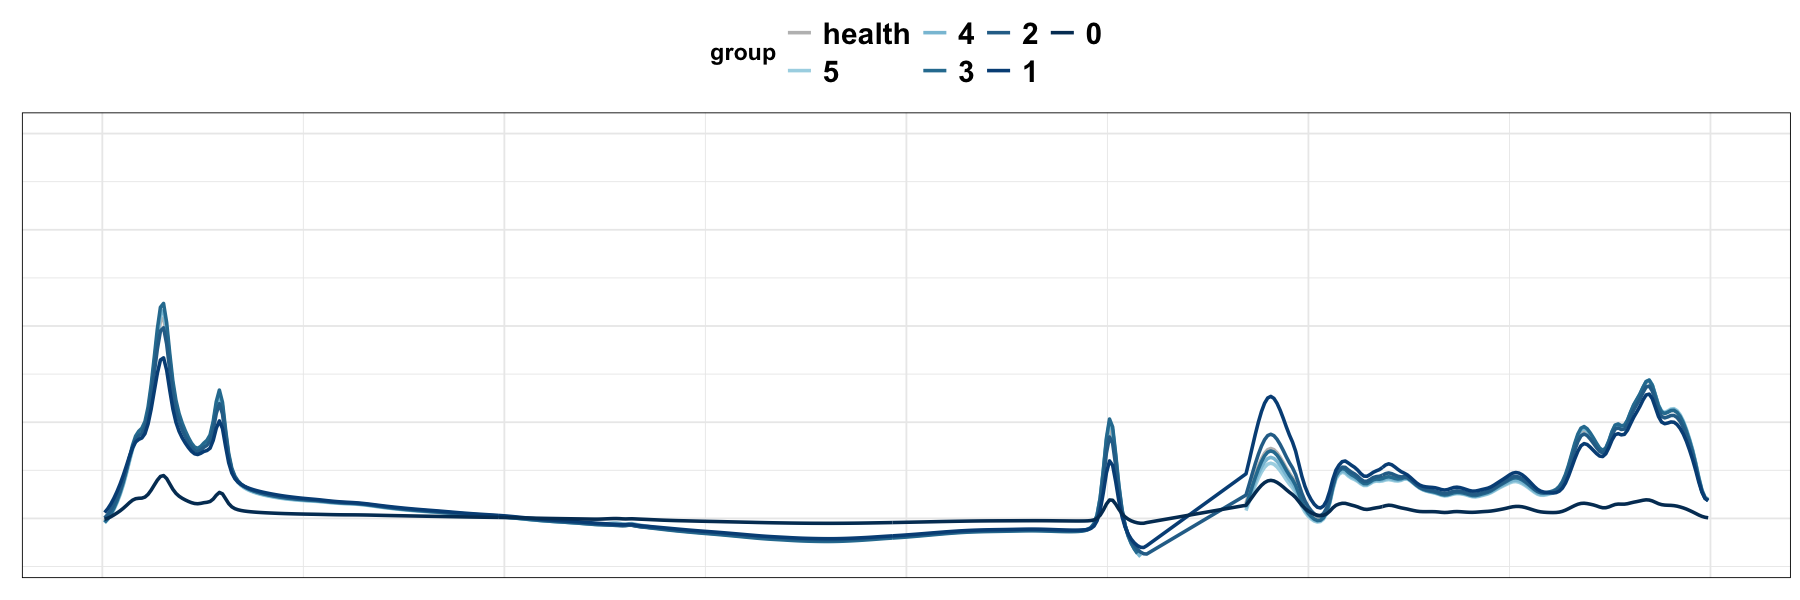

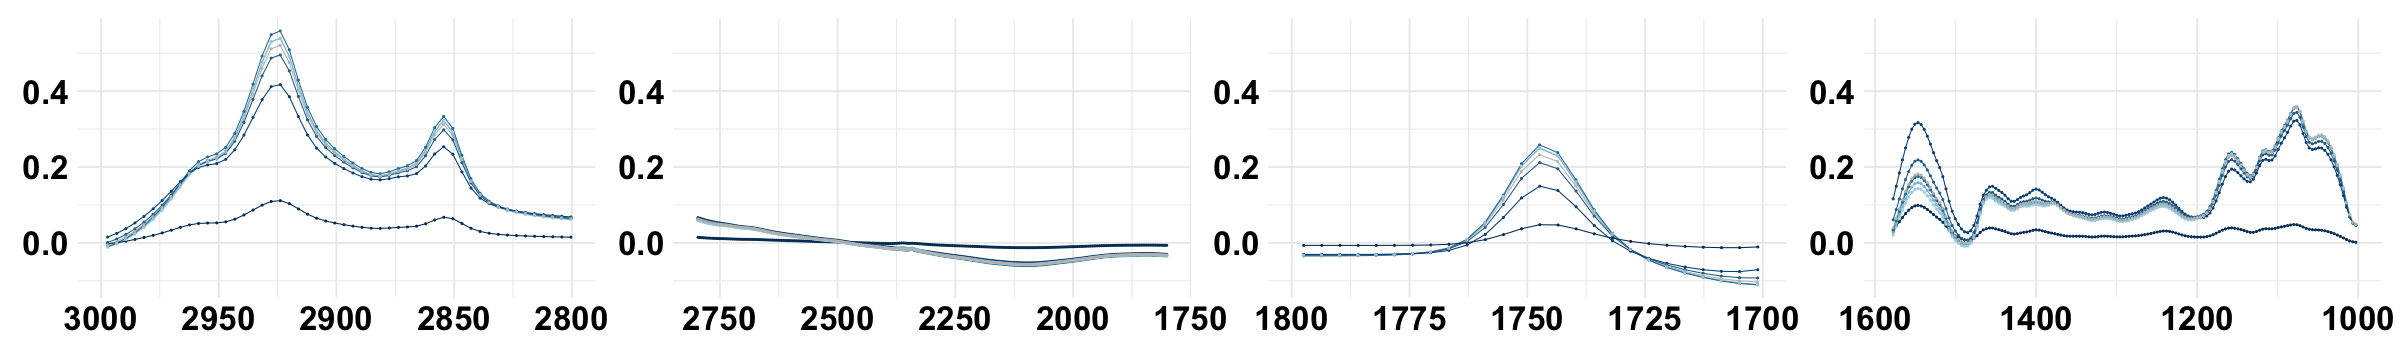

In [19]:
spc_all <- rbind(mast_filtered, health_filtered)
spc_all$wavenum <- as.numeric(spc_all$wavenum)

options(repr.plot.width=15, repr.plot.height=5)
pd <- position_dodge(0.1)
ggplot(spc_all, aes(x=wavenum, y=absorbance, color = group)) + 
    geom_line(position=pd, size = 1) +
    scale_x_reverse() +
    xlim(3000, 1000) +
    ylim(-0.1, 1) +
    theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 0, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "top", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank())  +
    scale_color_manual(values=c("grey", "#a9d6e5", "#89c2d9", "#2c7da0", "#2a6f97", "#014f86", "#013a63")) 

p1 <- ggplot(spc_all, aes(x=wavenum, y=absorbance, color = group)) + 
    geom_line(position=pd, size = 0.3) +
    geom_point(position=pd, size=0.2) +
    scale_color_manual(values=c("grey", "#a9d6e5", "#89c2d9", "#2c7da0", "#2a6f97", "#014f86", "#013a63")) +
    scale_x_reverse() +
    xlim(1585, 1000) +
    main_theme

p2 <- ggplot(spc_all, aes(x=wavenum, y=absorbance, color = group)) + 
    geom_line(position=pd, size = 0.3) +
    geom_point(position=pd, size=0.2) +
    scale_color_manual(values=c("grey", "#a9d6e5", "#89c2d9", "#2c7da0", "#2a6f97", "#014f86", "#013a63")) +
    scale_x_reverse() +
    xlim(1800, 1700) +
    main_theme

p3 <- ggplot(spc_all, aes(x=wavenum, y=absorbance, color = group)) + 
    geom_line(position=pd, size = 0.3) +
    geom_point(position=pd, size=0.2) +
    scale_color_manual(values=c("grey", "#a9d6e5", "#89c2d9", "#2c7da0", "#2a6f97", "#014f86", "#013a63")) +
    scale_x_reverse() +
    xlim(3000, 2800) +
    main_theme

p4 <- ggplot(spc_all, aes(x=wavenum, y=absorbance, color = group)) + 
    geom_line(position=pd, size = 0.3) +
    geom_point(position=pd, size=0.2) +
    scale_color_manual(values=c("grey", "#a9d6e5", "#89c2d9", "#2c7da0", "#2a6f97", "#014f86", "#013a63")) +
    scale_x_reverse() +
    xlim(2800, 1800) +
    main_theme

options(repr.plot.width=20, repr.plot.height=3)
p3 + p4 + p2 + p1 + plot_layout(nrow = 1)

#### Figure 3B

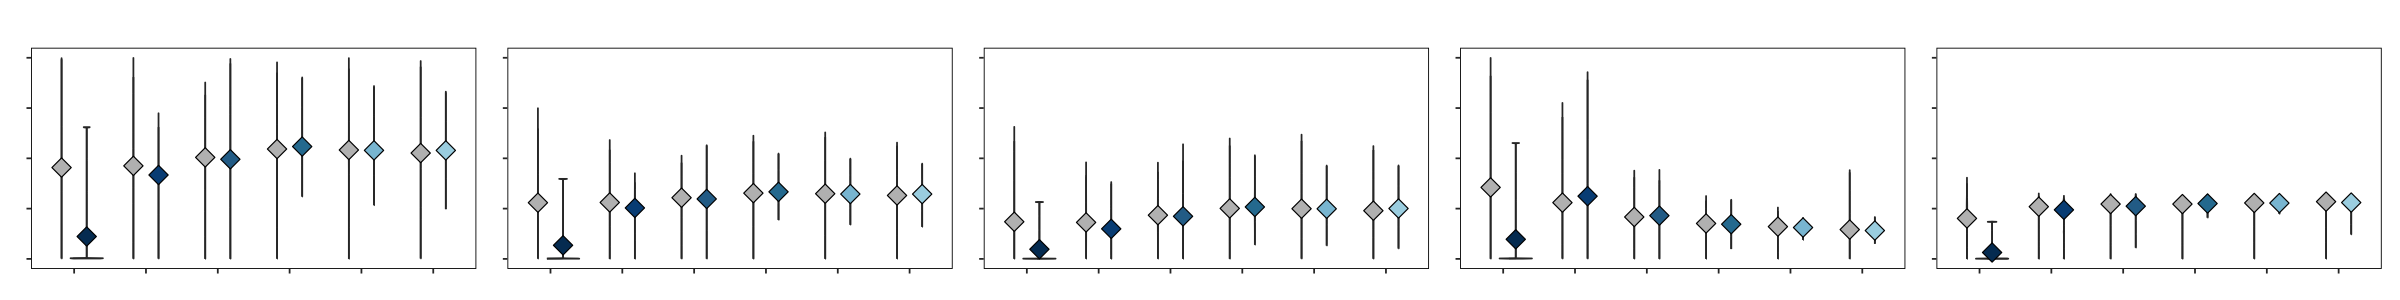

In [20]:
filter_data <- function(data) {
  data_filtered <- data[, which(as.numeric(colnames(data)) > 1000 & as.numeric(colnames(data)) < 3000)]
  data_filtered <- data_filtered[, which(as.numeric(colnames(data_filtered)) < 1580 | as.numeric(colnames(data_filtered)) > 1700)]
  data_filtered <- data.frame(absorbance = colMeans(data_filtered, na.rm = TRUE))
  data_filtered$wavenum <- as.numeric(rownames(data_filtered))
  
  return(data_filtered)
}

health <- spc %>% filter(disease == 0 & dim <= 7)

mast <- spc[!is.na(spc$dim_mast) & is.na(spc$dim_met) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$disease_in <= 7, ]
mast_0 <- mast[mast$dim == 0,] 
mast_1 <- mast[mast$dim == 1,] 
mast_2 <- mast[mast$dim == 2,] 
mast_3 <- mast[mast$dim == 3,]
mast_4 <- mast[mast$dim == 4,]
mast_5 <- mast[mast$dim >= 5 & mast$dim <= 7,] 

r11 <- c(health[['2923.87']], mast_0[['2923.87']], mast_1[['2923.87']], mast_2[['2923.87']], mast_3[['2923.87']], mast_4[['2923.87']], mast_5[['2923.87']])
dim <- c(health[['dim']], mast_0[['dim']], mast_1[['dim']], mast_2[['dim']], mast_3[['dim']], mast_4[['dim']], mast_5[['dim']])
group <- c(rep('health', length(health[['2923.87']])), rep('mast', length(mast_0[['2923.87']])), rep('mast', length(mast_1[['2923.87']])), rep('mast', length(mast_2[['2923.87']])), rep('mast', length(mast_3[['2923.87']])), rep('mast', length(mast_4[['2923.87']])), rep('mast', length(mast_5[['2923.87']])))
r11 <- data.frame(absorbance = r11, group = group, dim = dim)
r11$dim <- sapply(r11$dim, function(x) ifelse(x >= 5, '≥5', x))
r11$dim <- factor(r11$dim, levels=c("0", "1", "2", "3", "4", "≥5"))
                  
r12 <- c(health[['2854.44']], mast_0[['2854.44']], mast_1[['2854.44']], mast_2[['2854.44']], mast_3[['2854.44']], mast_4[['2854.44']], mast_5[['2854.44']])
dim <- c(health[['dim']], mast_0[['dim']], mast_1[['dim']], mast_2[['dim']], mast_3[['dim']], mast_4[['dim']], mast_5[['dim']])
group <- c(rep('health', length(health[['2854.44']])), rep('mast', length(mast_0[['2854.44']])), rep('mast', length(mast_1[['2854.44']])), rep('mast', length(mast_2[['2854.44']])), rep('mast', length(mast_3[['2854.44']])), rep('mast', length(mast_4[['2854.44']])), rep('mast', length(mast_5[['2854.44']])))
r12 <- data.frame(absorbance = r12, group = group, dim = dim)
r12$dim <- sapply(r12$dim, function(x) ifelse(x >= 5, '≥5', x))
r12$dim <- factor(r12$dim, levels=c("0", "1", "2", "3", "4", "≥5"))
                  
r2 <- c(health[['1747.38']], mast_0[['1747.38']], mast_1[['1747.38']], mast_2[['1747.38']], mast_3[['1747.38']], mast_4[['1747.38']], mast_5[['1747.38']])
dim <- c(health[['dim']], mast_0[['dim']], mast_1[['dim']], mast_2[['dim']], mast_3[['dim']], mast_4[['dim']], mast_5[['dim']])
group <- c(rep('health', length(health[['1747.38']])), rep('mast', length(mast_0[['1747.38']])), rep('mast', length(mast_1[['1747.38']])), rep('mast', length(mast_2[['1747.38']])), rep('mast', length(mast_3[['1747.38']])), rep('mast', length(mast_4[['1747.38']])), rep('mast', length(mast_5[['1747.38']])))
r2 <- data.frame(absorbance = r2, group = group, dim = dim)
r2$dim <- sapply(r2$dim, function(x) ifelse(x >= 5, '≥5', x))
r2$dim <- factor(r2$dim, levels=c("0", "1", "2", "3", "4", "≥5"))
                 
r31 <- c(health[['1542.94']], mast_0[['1542.94']], mast_1[['1542.94']], mast_2[['1542.94']], mast_3[['1542.94']], mast_4[['1542.94']], mast_5[['1542.94']])
dim <- c(health[['dim']], mast_0[['dim']], mast_1[['dim']], mast_2[['dim']], mast_3[['dim']], mast_4[['dim']], mast_5[['dim']])
group <- c(rep('health', length(health[['1542.94']])), rep('mast', length(mast_0[['1542.94']])), rep('mast', length(mast_1[['1542.94']])), rep('mast', length(mast_2[['1542.94']])), rep('mast', length(mast_3[['1542.94']])), rep('mast', length(mast_4[['1542.94']])), rep('mast', length(mast_5[['1542.94']])))
r31 <- data.frame(absorbance = r31, group = group, dim = dim)
r31$dim <- sapply(r31$dim, function(x) ifelse(x >= 5, '≥5', x))
r31$dim <- factor(r31$dim, levels=c("0", "1", "2", "3", "4", "≥5"))
                  
r32 <- c(health[['1041.48']], mast_0[['1041.48']], mast_1[['1041.48']], mast_2[['1041.48']], mast_3[['1041.48']], mast_4[['1041.48']], mast_5[['1041.48']])
dim <- c(health[['dim']], mast_0[['dim']], mast_1[['dim']], mast_2[['dim']], mast_3[['dim']], mast_4[['dim']], mast_5[['dim']])
group <- c(rep('health', length(health[['1041.48']])), rep('mast', length(mast_0[['1041.48']])), rep('mast', length(mast_1[['1041.48']])), rep('mast', length(mast_2[['1041.48']])), rep('mast', length(mast_3[['1041.48']])), rep('mast', length(mast_4[['1041.48']])), rep('mast', length(mast_5[['1041.48']])))
r32 <- data.frame(absorbance = r32, group = group, dim = dim)
r32$dim <- sapply(r32$dim, function(x) ifelse(x >= 5, '≥5', x))
r32$dim <- factor(r32$dim, levels=c("0", "1", "2", "3", "4", "≥5"))
                  
p1 <- ggplot(r11, aes(x=dim, y=absorbance, fill=interaction(dim, group))) + 
 geom_violin(position = position_dodge(width = 0.7), trim = FALSE) +
  stat_summary(position = position_dodge(width = 0.7), fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  scale_fill_manual(values=c("grey", "grey", "grey", "grey", "grey", "grey", "#013a63", "#014f86", "#2a6f97", "#2c7da0", "#89c2d9", "#a9d6e5")) +
  ggtitle("") +
  theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 0), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle=90), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank())
                  
p2 <- ggplot(r12, aes(x=dim, y=absorbance, fill=interaction(dim, group))) + 
 geom_violin(position = position_dodge(width = 0.7), trim = FALSE) +
  stat_summary(position = position_dodge(width = 0.7), fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  scale_fill_manual(values=c("grey", "grey", "grey", "grey", "grey", "grey", "#013a63", "#014f86", "#2a6f97", "#2c7da0", "#89c2d9", "#a9d6e5")) +
  ggtitle("") +
  theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 0), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle=90), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank())
                  
p3 <- ggplot(r2, aes(x=dim, y=absorbance, fill=interaction(dim, group))) + 
 geom_violin(position = position_dodge(width = 0.7), trim = FALSE) +
  stat_summary(position = position_dodge(width = 0.7), fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  scale_fill_manual(values=c("grey", "grey", "grey", "grey", "grey", "grey", "#013a63", "#014f86", "#2a6f97", "#2c7da0", "#89c2d9", "#a9d6e5")) +
  ggtitle("") +
  theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 0), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle=90), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank())
                  
p4 <- ggplot(r31, aes(x=dim, y=absorbance, fill=interaction(dim, group))) + 
 geom_violin(position = position_dodge(width = 0.7), trim = FALSE) +
  stat_summary(position = position_dodge(width = 0.7), fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  scale_fill_manual(values=c("grey", "grey", "grey", "grey", "grey", "grey", "#013a63", "#014f86", "#2a6f97", "#2c7da0", "#89c2d9", "#a9d6e5")) +
  ggtitle("") +
  theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 0), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle=90), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank())
                  
p5 <- ggplot(r32, aes(x=dim, y=absorbance, fill=interaction(dim, group))) + 
 geom_violin(position = position_dodge(width = 0.7), trim = FALSE) +
  stat_summary(position = position_dodge(width = 0.7), fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  scale_fill_manual(values=c("grey", "grey", "grey", "grey", "grey", "grey", "#013a63", "#014f86", "#2a6f97", "#2c7da0", "#89c2d9", "#a9d6e5")) +
  ggtitle("") +
  theme(strip.text = element_text(size=0),
    axis.text.y = element_text(colour = "black", size = 0), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle=90), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank())
                  
options(repr.plot.width=20, repr.plot.height=2.5)
p1 + p2 + p3 + p4 + p5 + plot_layout(nrow = 1)

In [10]:
r11 %>%
  filter(dim == 0) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r11 %>%
  filter(dim == 1) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r11 %>%
  filter(dim == 2) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r11 %>%
  filter(dim == 3) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r11 %>%
  filter(dim == 4) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r11 %>%
  filter(dim == '≥5') %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 311, p-value = 0.03494
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 2492, p-value = 0.329
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 4474, p-value = 0.6195
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 3362, p-value = 0.6743
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 3834, p-value = 0.784
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 33811, p-value = 0.1071
alternative hypothesis: true location shift is not equal to 0



In [11]:
r12 %>%
  filter(dim == 0) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r12 %>%
  filter(dim == 1) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r12 %>%
  filter(dim == 2) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r12 %>%
  filter(dim == 3) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r12 %>%
  filter(dim == 4) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r12 %>%
  filter(dim == '≥5') %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 306, p-value = 0.04443
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 2498, p-value = 0.3201
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 4455, p-value = 0.6428
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 3345, p-value = 0.6509
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 3847, p-value = 0.7651
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 34123, p-value = 0.1313
alternative hypothesis: true location shift is not equal to 0



In [12]:
r2 %>%
  filter(dim == 0) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r2 %>%
  filter(dim == 1) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r2 %>%
  filter(dim == 2) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r2 %>%
  filter(dim == 3) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r2 %>%
  filter(dim == 4) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r2 %>%
  filter(dim == '≥5') %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 319, p-value = 0.02336
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 2563, p-value = 0.2341
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 4558, p-value = 0.5215
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 3364, p-value = 0.6771
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 3699, p-value = 0.9856
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 32726, p-value = 0.04915
alternative hypothesis: true location shift is not equal to 0



In [13]:
r31 %>%
  filter(dim == 0) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r31 %>%
  filter(dim == 1) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r31 %>%
  filter(dim == 2) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r31 %>%
  filter(dim == 3) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r31 %>%
  filter(dim == 4) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r31 %>%
  filter(dim == '≥5') %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 313, p-value = 0.03166
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 2050, p-value = 0.7245
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 3882, p-value = 0.6026
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 3845, p-value = 0.6211
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 4199, p-value = 0.3338
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 44336, p-value = 0.06567
alternative hypothesis: true location shift is not equal to 0



In [14]:
r32 %>%
  filter(dim == 0) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r32 %>%
  filter(dim == 1) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r32 %>%
  filter(dim == 2) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r32 %>%
  filter(dim == 3) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r32 %>%
  filter(dim == 4) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r32 %>%
  filter(dim == '≥5') %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 367, p-value = 0.001291
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 2504, p-value = 0.3114
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 4181, p-value = 0.9952
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 3337, p-value = 0.64
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 3852, p-value = 0.7579
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 47751, p-value = 0.003067
alternative hypothesis: true location shift is not equal to 0



#### Supplemental Figure 2 

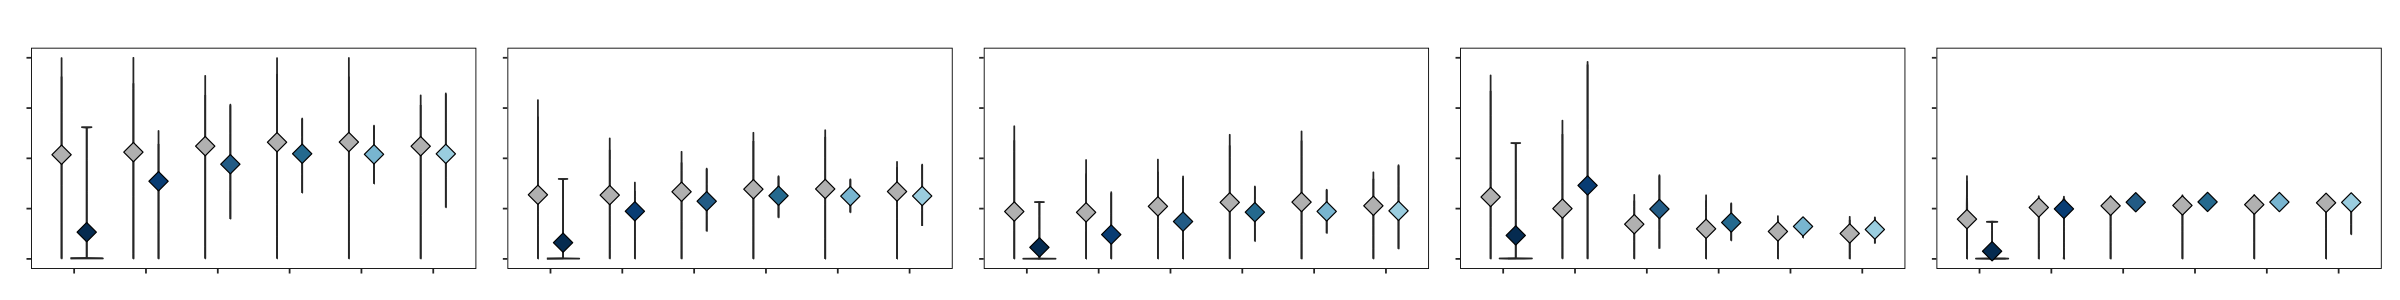

In [21]:
filter_data <- function(data) {
  data_filtered <- data[, which(as.numeric(colnames(data)) > 1000 & as.numeric(colnames(data)) < 3000)]
  data_filtered <- data_filtered[, which(as.numeric(colnames(data_filtered)) < 1580 | as.numeric(colnames(data_filtered)) > 1700)]
  data_filtered <- data.frame(absorbance = colMeans(data_filtered, na.rm = TRUE))
  data_filtered$wavenum <- as.numeric(rownames(data_filtered))
  
  return(data_filtered)
}

health <- spc %>% filter(disease == 0 & dim <= 7 & parity == 1)

mast <- spc[!is.na(spc$dim_mast) & is.na(spc$dim_met) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$disease_in <= 7 & spc$parity >= 2, ]
mast_0 <- mast[mast$dim == 0,] 
mast_1 <- mast[mast$dim == 1,] 
mast_2 <- mast[mast$dim == 2,] 
mast_3 <- mast[mast$dim == 3,]
mast_4 <- mast[mast$dim == 4,]
mast_5 <- mast[mast$dim >= 5 & mast$dim <= 7,] 

r11 <- c(health[['2923.87']], mast_0[['2923.87']], mast_1[['2923.87']], mast_2[['2923.87']], mast_3[['2923.87']], mast_4[['2923.87']], mast_5[['2923.87']])
dim <- c(health[['dim']], mast_0[['dim']], mast_1[['dim']], mast_2[['dim']], mast_3[['dim']], mast_4[['dim']], mast_5[['dim']])
group <- c(rep('health', length(health[['2923.87']])), rep('mast', length(mast_0[['2923.87']])), rep('mast', length(mast_1[['2923.87']])), rep('mast', length(mast_2[['2923.87']])), rep('mast', length(mast_3[['2923.87']])), rep('mast', length(mast_4[['2923.87']])), rep('mast', length(mast_5[['2923.87']])))
r11 <- data.frame(absorbance = r11, group = group, dim = dim)
r11$dim <- sapply(r11$dim, function(x) ifelse(x >= 5, '≥5', x))
r11$dim <- factor(r11$dim, levels=c("0", "1", "2", "3", "4", "≥5"))
                  
r12 <- c(health[['2854.44']], mast_0[['2854.44']], mast_1[['2854.44']], mast_2[['2854.44']], mast_3[['2854.44']], mast_4[['2854.44']], mast_5[['2854.44']])
dim <- c(health[['dim']], mast_0[['dim']], mast_1[['dim']], mast_2[['dim']], mast_3[['dim']], mast_4[['dim']], mast_5[['dim']])
group <- c(rep('health', length(health[['2854.44']])), rep('mast', length(mast_0[['2854.44']])), rep('mast', length(mast_1[['2854.44']])), rep('mast', length(mast_2[['2854.44']])), rep('mast', length(mast_3[['2854.44']])), rep('mast', length(mast_4[['2854.44']])), rep('mast', length(mast_5[['2854.44']])))
r12 <- data.frame(absorbance = r12, group = group, dim = dim)
r12$dim <- sapply(r12$dim, function(x) ifelse(x >= 5, '≥5', x))
r12$dim <- factor(r12$dim, levels=c("0", "1", "2", "3", "4", "≥5"))
                  
r2 <- c(health[['1747.38']], mast_0[['1747.38']], mast_1[['1747.38']], mast_2[['1747.38']], mast_3[['1747.38']], mast_4[['1747.38']], mast_5[['1747.38']])
dim <- c(health[['dim']], mast_0[['dim']], mast_1[['dim']], mast_2[['dim']], mast_3[['dim']], mast_4[['dim']], mast_5[['dim']])
group <- c(rep('health', length(health[['1747.38']])), rep('mast', length(mast_0[['1747.38']])), rep('mast', length(mast_1[['1747.38']])), rep('mast', length(mast_2[['1747.38']])), rep('mast', length(mast_3[['1747.38']])), rep('mast', length(mast_4[['1747.38']])), rep('mast', length(mast_5[['1747.38']])))
r2 <- data.frame(absorbance = r2, group = group, dim = dim)
r2$dim <- sapply(r2$dim, function(x) ifelse(x >= 5, '≥5', x))
r2$dim <- factor(r2$dim, levels=c("0", "1", "2", "3", "4", "≥5"))
                 
r31 <- c(health[['1542.94']], mast_0[['1542.94']], mast_1[['1542.94']], mast_2[['1542.94']], mast_3[['1542.94']], mast_4[['1542.94']], mast_5[['1542.94']])
dim <- c(health[['dim']], mast_0[['dim']], mast_1[['dim']], mast_2[['dim']], mast_3[['dim']], mast_4[['dim']], mast_5[['dim']])
group <- c(rep('health', length(health[['1542.94']])), rep('mast', length(mast_0[['1542.94']])), rep('mast', length(mast_1[['1542.94']])), rep('mast', length(mast_2[['1542.94']])), rep('mast', length(mast_3[['1542.94']])), rep('mast', length(mast_4[['1542.94']])), rep('mast', length(mast_5[['1542.94']])))
r31 <- data.frame(absorbance = r31, group = group, dim = dim)
r31$dim <- sapply(r31$dim, function(x) ifelse(x >= 5, '≥5', x))
r31$dim <- factor(r31$dim, levels=c("0", "1", "2", "3", "4", "≥5"))
                  
r32 <- c(health[['1041.48']], mast_0[['1041.48']], mast_1[['1041.48']], mast_2[['1041.48']], mast_3[['1041.48']], mast_4[['1041.48']], mast_5[['1041.48']])
dim <- c(health[['dim']], mast_0[['dim']], mast_1[['dim']], mast_2[['dim']], mast_3[['dim']], mast_4[['dim']], mast_5[['dim']])
group <- c(rep('health', length(health[['1041.48']])), rep('mast', length(mast_0[['1041.48']])), rep('mast', length(mast_1[['1041.48']])), rep('mast', length(mast_2[['1041.48']])), rep('mast', length(mast_3[['1041.48']])), rep('mast', length(mast_4[['1041.48']])), rep('mast', length(mast_5[['1041.48']])))
r32 <- data.frame(absorbance = r32, group = group, dim = dim)
r32$dim <- sapply(r32$dim, function(x) ifelse(x >= 5, '≥5', x))
r32$dim <- factor(r32$dim, levels=c("0", "1", "2", "3", "4", "≥5"))
                  
p1 <- ggplot(r11, aes(x=dim, y=absorbance, fill=interaction(dim, group))) + 
 geom_violin(position = position_dodge(width = 0.7), trim = FALSE) +
  stat_summary(position = position_dodge(width = 0.7), fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  scale_fill_manual(values=c("grey", "grey", "grey", "grey", "grey", "grey", "#013a63", "#014f86", "#2a6f97", "#2c7da0", "#89c2d9", "#a9d6e5")) +
  ggtitle("") +
  theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 0), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle=90), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank())
                  
p2 <- ggplot(r12, aes(x=dim, y=absorbance, fill=interaction(dim, group))) + 
 geom_violin(position = position_dodge(width = 0.7), trim = FALSE) +
  stat_summary(position = position_dodge(width = 0.7), fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  scale_fill_manual(values=c("grey", "grey", "grey", "grey", "grey", "grey", "#013a63", "#014f86", "#2a6f97", "#2c7da0", "#89c2d9", "#a9d6e5")) +
  ggtitle("") +
  theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 0), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle=90), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank())
                  
p3 <- ggplot(r2, aes(x=dim, y=absorbance, fill=interaction(dim, group))) + 
 geom_violin(position = position_dodge(width = 0.7), trim = FALSE) +
  stat_summary(position = position_dodge(width = 0.7), fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  scale_fill_manual(values=c("grey", "grey", "grey", "grey", "grey", "grey", "#013a63", "#014f86", "#2a6f97", "#2c7da0", "#89c2d9", "#a9d6e5")) +
  ggtitle("") +
  theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 0), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle=90), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank())
                  
p4 <- ggplot(r31, aes(x=dim, y=absorbance, fill=interaction(dim, group))) + 
 geom_violin(position = position_dodge(width = 0.7), trim = FALSE) +
  stat_summary(position = position_dodge(width = 0.7), fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  scale_fill_manual(values=c("grey", "grey", "grey", "grey", "grey", "grey", "#013a63", "#014f86", "#2a6f97", "#2c7da0", "#89c2d9", "#a9d6e5")) +
  ggtitle("") +
  theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 0), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle=90), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank())
                  
p5 <- ggplot(r32, aes(x=dim, y=absorbance, fill=interaction(dim, group))) + 
 geom_violin(position = position_dodge(width = 0.7), trim = FALSE) +
  stat_summary(position = position_dodge(width = 0.7), fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  scale_fill_manual(values=c("grey", "grey", "grey", "grey", "grey", "grey", "#013a63", "#014f86", "#2a6f97", "#2c7da0", "#89c2d9", "#a9d6e5")) +
  ggtitle("") +
  theme(strip.text = element_text(size=0),
    axis.text.y = element_text(colour = "black", size = 0), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle=90), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank())

         
options(repr.plot.width=20, repr.plot.height=2.5)
p1 + p2 + p3 + p4 + p5 + plot_layout(nrow = 1)

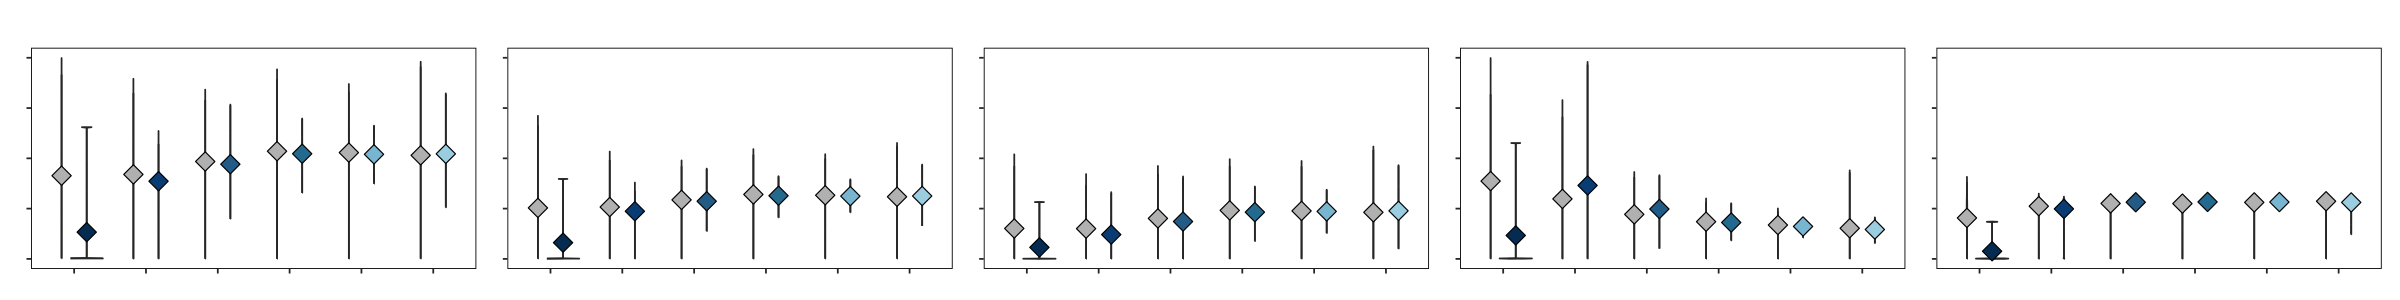

In [16]:
filter_data <- function(data) {
  data_filtered <- data[, which(as.numeric(colnames(data)) > 1000 & as.numeric(colnames(data)) < 3000)]
  data_filtered <- data_filtered[, which(as.numeric(colnames(data_filtered)) < 1580 | as.numeric(colnames(data_filtered)) > 1700)]
  data_filtered <- data.frame(absorbance = colMeans(data_filtered, na.rm = TRUE))
  data_filtered$wavenum <- as.numeric(rownames(data_filtered))
  
  return(data_filtered)
}

health <- spc %>% filter(disease == 0 & dim <= 7 & parity > 1)

mast <- spc[!is.na(spc$dim_mast) & is.na(spc$dim_met) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$disease_in <= 7 & spc$parity >= 2, ]
mast_0 <- mast[mast$dim == 0,] 
mast_1 <- mast[mast$dim == 1,] 
mast_2 <- mast[mast$dim == 2,] 
mast_3 <- mast[mast$dim == 3,]
mast_4 <- mast[mast$dim == 4,]
mast_5 <- mast[mast$dim >= 5 & mast$dim <= 7,] 

r11 <- c(health[['2923.87']], mast_0[['2923.87']], mast_1[['2923.87']], mast_2[['2923.87']], mast_3[['2923.87']], mast_4[['2923.87']], mast_5[['2923.87']])
dim <- c(health[['dim']], mast_0[['dim']], mast_1[['dim']], mast_2[['dim']], mast_3[['dim']], mast_4[['dim']], mast_5[['dim']])
group <- c(rep('health', length(health[['2923.87']])), rep('mast', length(mast_0[['2923.87']])), rep('mast', length(mast_1[['2923.87']])), rep('mast', length(mast_2[['2923.87']])), rep('mast', length(mast_3[['2923.87']])), rep('mast', length(mast_4[['2923.87']])), rep('mast', length(mast_5[['2923.87']])))
r11 <- data.frame(absorbance = r11, group = group, dim = dim)
r11$dim <- sapply(r11$dim, function(x) ifelse(x >= 5, '≥5', x))
r11$dim <- factor(r11$dim, levels=c("0", "1", "2", "3", "4", "≥5"))
                  
r12 <- c(health[['2854.44']], mast_0[['2854.44']], mast_1[['2854.44']], mast_2[['2854.44']], mast_3[['2854.44']], mast_4[['2854.44']], mast_5[['2854.44']])
dim <- c(health[['dim']], mast_0[['dim']], mast_1[['dim']], mast_2[['dim']], mast_3[['dim']], mast_4[['dim']], mast_5[['dim']])
group <- c(rep('health', length(health[['2854.44']])), rep('mast', length(mast_0[['2854.44']])), rep('mast', length(mast_1[['2854.44']])), rep('mast', length(mast_2[['2854.44']])), rep('mast', length(mast_3[['2854.44']])), rep('mast', length(mast_4[['2854.44']])), rep('mast', length(mast_5[['2854.44']])))
r12 <- data.frame(absorbance = r12, group = group, dim = dim)
r12$dim <- sapply(r12$dim, function(x) ifelse(x >= 5, '≥5', x))
r12$dim <- factor(r12$dim, levels=c("0", "1", "2", "3", "4", "≥5"))
                  
r2 <- c(health[['1747.38']], mast_0[['1747.38']], mast_1[['1747.38']], mast_2[['1747.38']], mast_3[['1747.38']], mast_4[['1747.38']], mast_5[['1747.38']])
dim <- c(health[['dim']], mast_0[['dim']], mast_1[['dim']], mast_2[['dim']], mast_3[['dim']], mast_4[['dim']], mast_5[['dim']])
group <- c(rep('health', length(health[['1747.38']])), rep('mast', length(mast_0[['1747.38']])), rep('mast', length(mast_1[['1747.38']])), rep('mast', length(mast_2[['1747.38']])), rep('mast', length(mast_3[['1747.38']])), rep('mast', length(mast_4[['1747.38']])), rep('mast', length(mast_5[['1747.38']])))
r2 <- data.frame(absorbance = r2, group = group, dim = dim)
r2$dim <- sapply(r2$dim, function(x) ifelse(x >= 5, '≥5', x))
r2$dim <- factor(r2$dim, levels=c("0", "1", "2", "3", "4", "≥5"))
                 
r31 <- c(health[['1542.94']], mast_0[['1542.94']], mast_1[['1542.94']], mast_2[['1542.94']], mast_3[['1542.94']], mast_4[['1542.94']], mast_5[['1542.94']])
dim <- c(health[['dim']], mast_0[['dim']], mast_1[['dim']], mast_2[['dim']], mast_3[['dim']], mast_4[['dim']], mast_5[['dim']])
group <- c(rep('health', length(health[['1542.94']])), rep('mast', length(mast_0[['1542.94']])), rep('mast', length(mast_1[['1542.94']])), rep('mast', length(mast_2[['1542.94']])), rep('mast', length(mast_3[['1542.94']])), rep('mast', length(mast_4[['1542.94']])), rep('mast', length(mast_5[['1542.94']])))
r31 <- data.frame(absorbance = r31, group = group, dim = dim)
r31$dim <- sapply(r31$dim, function(x) ifelse(x >= 5, '≥5', x))
r31$dim <- factor(r31$dim, levels=c("0", "1", "2", "3", "4", "≥5"))
                  
r32 <- c(health[['1041.48']], mast_0[['1041.48']], mast_1[['1041.48']], mast_2[['1041.48']], mast_3[['1041.48']], mast_4[['1041.48']], mast_5[['1041.48']])
dim <- c(health[['dim']], mast_0[['dim']], mast_1[['dim']], mast_2[['dim']], mast_3[['dim']], mast_4[['dim']], mast_5[['dim']])
group <- c(rep('health', length(health[['1041.48']])), rep('mast', length(mast_0[['1041.48']])), rep('mast', length(mast_1[['1041.48']])), rep('mast', length(mast_2[['1041.48']])), rep('mast', length(mast_3[['1041.48']])), rep('mast', length(mast_4[['1041.48']])), rep('mast', length(mast_5[['1041.48']])))
r32 <- data.frame(absorbance = r32, group = group, dim = dim)
r32$dim <- sapply(r32$dim, function(x) ifelse(x >= 5, '≥5', x))
r32$dim <- factor(r32$dim, levels=c("0", "1", "2", "3", "4", "≥5"))
                  
p1 <- ggplot(r11, aes(x=dim, y=absorbance, fill=interaction(dim, group))) + 
 geom_violin(position = position_dodge(width = 0.7), trim = FALSE) +
  stat_summary(position = position_dodge(width = 0.7), fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  scale_fill_manual(values=c("grey", "grey", "grey", "grey", "grey", "grey", "#013a63", "#014f86", "#2a6f97", "#2c7da0", "#89c2d9", "#a9d6e5")) +
  ggtitle("") +
  theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 0), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle=90), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank())
                  
p2 <- ggplot(r12, aes(x=dim, y=absorbance, fill=interaction(dim, group))) + 
 geom_violin(position = position_dodge(width = 0.7), trim = FALSE) +
  stat_summary(position = position_dodge(width = 0.7), fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  scale_fill_manual(values=c("grey", "grey", "grey", "grey", "grey", "grey", "#013a63", "#014f86", "#2a6f97", "#2c7da0", "#89c2d9", "#a9d6e5")) +
  ggtitle("") +
  theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 0), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle=90), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank())
                  
p3 <- ggplot(r2, aes(x=dim, y=absorbance, fill=interaction(dim, group))) + 
 geom_violin(position = position_dodge(width = 0.7), trim = FALSE) +
  stat_summary(position = position_dodge(width = 0.7), fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  scale_fill_manual(values=c("grey", "grey", "grey", "grey", "grey", "grey", "#013a63", "#014f86", "#2a6f97", "#2c7da0", "#89c2d9", "#a9d6e5")) +
  ggtitle("") +
  theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 0), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle=90), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank())
                  
p4 <- ggplot(r31, aes(x=dim, y=absorbance, fill=interaction(dim, group))) + 
 geom_violin(position = position_dodge(width = 0.7), trim = FALSE) +
  stat_summary(position = position_dodge(width = 0.7), fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  scale_fill_manual(values=c("grey", "grey", "grey", "grey", "grey", "grey", "#013a63", "#014f86", "#2a6f97", "#2c7da0", "#89c2d9", "#a9d6e5")) +
  ggtitle("") +
  theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 0), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle=90), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank())
                  
p5 <- ggplot(r32, aes(x=dim, y=absorbance, fill=interaction(dim, group))) + 
 geom_violin(position = position_dodge(width = 0.7), trim = FALSE) +
  stat_summary(position = position_dodge(width = 0.7), fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  scale_fill_manual(values=c("grey", "grey", "grey", "grey", "grey", "grey", "#013a63", "#014f86", "#2a6f97", "#2c7da0", "#89c2d9", "#a9d6e5")) +
  ggtitle("") +
  theme(strip.text = element_text(size=0),
    axis.text.y = element_text(colour = "black", size = 0), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle=90), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank())
       
options(repr.plot.width=20, repr.plot.height=2.5)
p1 + p2 + p3 + p4 + p5 + plot_layout(nrow = 1)

#### Figure 3C

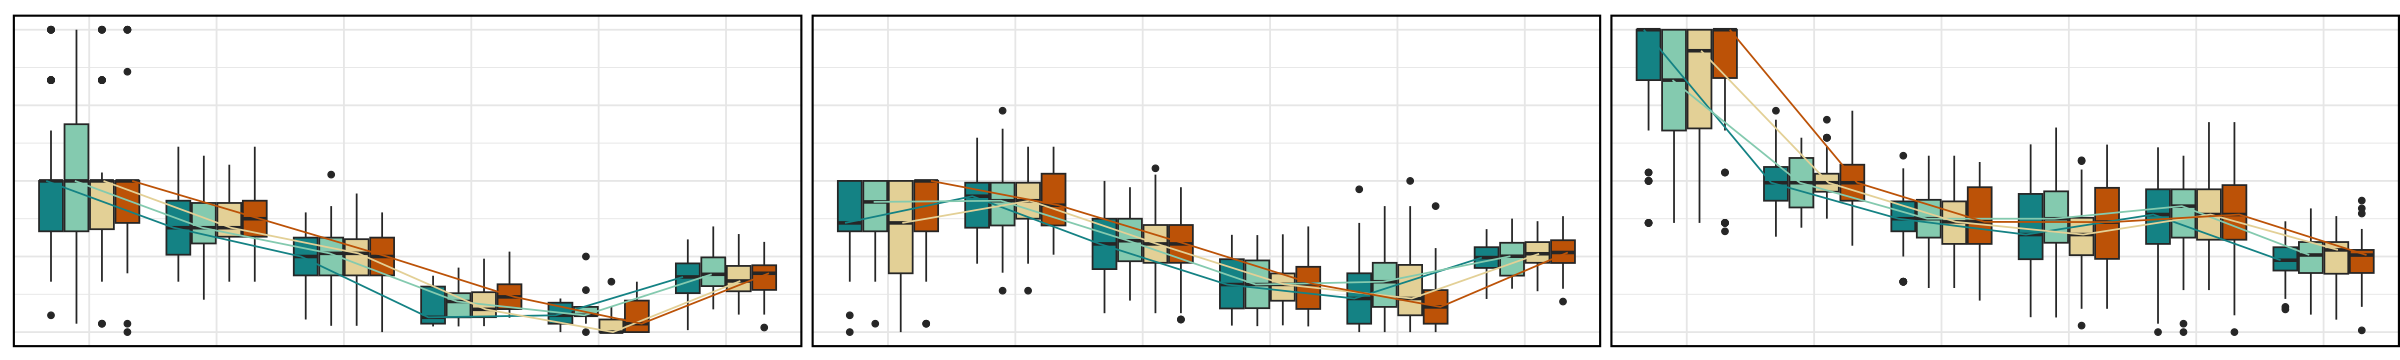

In [22]:
data <- read.csv('/path/to/data/mast_forward.csv', sep = ",", header = T, row.names = NULL)
data <- gather(data, key = "metrics", value ="value", -model, -para, -group, -type)
data <- data %>% filter(model != 'MLP') %>% filter(metrics == 'accuracy')
data$model <- factor(data$model, levels=c('PLS-DA', 'RF', 'LSTM'))
data$para <- factor(data$para, levels=c("mast0", "mast1", "mast2", "mast3", "mast4", "mast5"))
data$group <- factor(data$group, levels=c('s', 'sp', 'spm', 'spmc'))

options(repr.plot.width=20, repr.plot.height=3)
ggplot(data, aes(x=para, y=value, fill=group)) + 
  geom_boxplot(position=position_dodge(0.8)) +
  stat_summary(fun.y = median, geom = 'line', aes(group = group, color = group), position = position_dodge(width = 0.9)) +
scale_x_discrete(labels = c("mast0", "mast1", "mast2", "mast3", "mast4", "mast5")) +
scale_fill_manual(values=c('#0a9396', '#94d2bd', '#e9d8a6', '#ca6702')) + # '#E68B81', '#EAAA60', '#7DA6C6', 'grey'
scale_color_manual(values=c('#0a9396', '#94d2bd', '#e9d8a6', '#ca6702')) + 
 facet_grid(cols = vars(model)) +
 ylim(0.6, 1) +
    theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=0, face="bold"),
    axis.text.y = element_text(colour = "black", size = 0), 
    axis.text.x = element_text(colour = "black", size = 0, angle = 90, vjust = 0.5, hjust = 1), 
    legend.text = element_text(size = 10, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 0, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 1.2),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))

#### Supplemental Figure 4

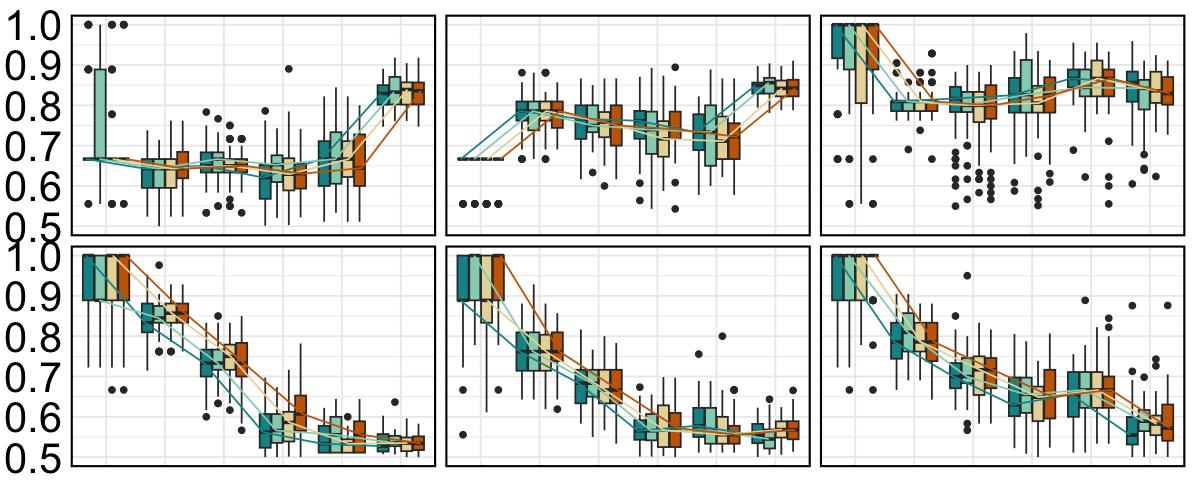

In [23]:
data <- read.csv('/path/to/data/mast_forward.csv', sep = ",", header = T, row.names = NULL)
data <- gather(data, key = "metrics", value ="value", -model, -para, -group, -type)
data <- data %>% filter(model != 'MLP') %>% filter(metrics != 'accuracy')
data$model <- factor(data$model, levels=c('PLS-DA', 'RF', 'LSTM'))
data$para <- factor(data$para, levels=c("mast0", "mast1", "mast2", "mast3", "mast4", "mast5"))
data$group <- factor(data$group, levels=c('s', 'sp', 'spm', 'spmc'))

options(repr.plot.width=10, repr.plot.height=4)
ggplot(data, aes(x=para, y=value, fill=group)) + 
  geom_boxplot(position=position_dodge(0.8)) +
  stat_summary(fun.y = median, geom = 'line', aes(group = group, color = group), position = position_dodge(width = 0.9)) +
scale_x_discrete(labels = c("mast0", "mast1", "mast2", "mast3", "mast4", "mast5")) +
scale_fill_manual(values=c('#0a9396', '#94d2bd', '#e9d8a6', '#ca6702')) + 
scale_color_manual(values=c('#0a9396', '#94d2bd', '#e9d8a6', '#ca6702')) + 
 facet_grid(rows = vars(metrics), cols = vars(model)) +
 ylim(0.5, 1) +
    theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=0, face="bold"),
    axis.text.y = element_text(colour = "black", size = 25), 
    axis.text.x = element_text(colour = "black", size = 0, angle = 90, vjust = 0.5, hjust = 1), 
    legend.text = element_text(size = 10, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 0, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 1.2),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))